In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import requests
from tqdm import tqdm_notebook
import plotly.graph_objects as go
from pprint import pprint

# Import API key
from api_keys import api_key

In [2]:
url=f'http://api.eia.gov/series/?api_key={api_key}&series_id=EMISS.CO2-TOTV-CC-TO-AL.A'
print(url)
response=requests.get(url).json()
pprint(response)

http://api.eia.gov/series/?api_key=d7c7d5a92f23e68e5710fc5cfbd273dc&series_id=EMISS.CO2-TOTV-CC-TO-AL.A
{'request': {'command': 'series', 'series_id': 'EMISS.CO2-TOTV-CC-TO-AL.A'},
 'series': [{'copyright': 'None',
             'data': [['2016', 2.21873],
                      ['2015', 2.164081],
                      ['2014', 1.929239],
                      ['2013', 1.830011],
                      ['2012', 1.777356],
                      ['2011', 2.045582],
                      ['2010', 2.110883],
                      ['2009', 1.889718],
                      ['2008', 1.998817],
                      ['2007', 1.981095],
                      ['2006', 2.215215],
                      ['2005', 1.844327],
                      ['2004', 2.154692],
                      ['2003', 2.101106],
                      ['2002', 1.992065],
                      ['2001', 2.163179],
                      ['2000', 2.24985],
                      ['1999', 2.188748],
                      ['1998', 

In [3]:
#Commercial Sector
url = "http://api.eia.gov/series/?api_key="
com_api_code1 = "&series_id=EMISS.CO2-TOTV-CC-TO-"
ec_api_code1 = "&series_id=EMISS.CO2-TOTV-EC-TO-"
trans_api_code1 = "&series_id=EMISS.CO2-TOTV-TC-TO-"
res_api_code1 = "&series_id=EMISS.CO2-TOTV-RC-TO-"
ind_api_code1 = "&series_id=EMISS.CO2-TOTV-IC-TO-"

api_code2 = ".A"

state_abb = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA",
           "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD",
           "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ",
           "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC",
           "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

In [4]:
#Commercial Sector API call
start = []
end = []
f = []
geo = []
state = []
name = []
sector = []
series_id = []
source = []
units = []
units_short = []
updated = []
year = []
emission = []
data = []
count_st = 0

for st in state_abb:
        query_url = url + api_key + com_api_code1 + st + api_code2
        count_st = count_st + 1
        print("Processing Record " + str(count_st) + " | " + st)

        emiss_response = requests.get(query_url).json()
        
       
        data.append(emiss_response["series"][0]["data"])
        ln = (len(data[0]))

        for i in range(0,ln):
            start.append(emiss_response["series"][0]["start"])
            end.append(emiss_response["series"][0]["end"])
            f.append(emiss_response["series"][0]["f"])
            geo.append(emiss_response["series"][0]["geography"])
            state.append(emiss_response["series"][0]["geography"].split("-")[1])
            name.append(emiss_response["series"][0]["name"])
            sector.append(emiss_response["series"][0]["name"].split(" ")[0])
            series_id.append(emiss_response["series"][0]["series_id"])
            source.append(emiss_response["series"][0]["source"])
            units.append(emiss_response["series"][0]["units"])
            units_short.append(emiss_response["series"][0]["unitsshort"])
            updated.append(emiss_response["series"][0]["updated"])
            year.append(emiss_response["series"][0]["data"][i][0])
            emission.append(emiss_response["series"][0]["data"][i][1])
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Processing Record 1 | AL
Processing Record 2 | AK
Processing Record 3 | AZ
Processing Record 4 | AR
Processing Record 5 | CA
Processing Record 6 | CO
Processing Record 7 | CT
Processing Record 8 | DE
Processing Record 9 | FL
Processing Record 10 | GA
Processing Record 11 | HI
Processing Record 12 | ID
Processing Record 13 | IL
Processing Record 14 | IN
Processing Record 15 | IA
Processing Record 16 | KS
Processing Record 17 | KY
Processing Record 18 | LA
Processing Record 19 | ME
Processing Record 20 | MD
Processing Record 21 | MA
Processing Record 22 | MI
Processing Record 23 | MN
Processing Record 24 | MS
Processing Record 25 | MO
Processing Record 26 | MT
Processing Record 27 | NE
Processing Record 28 | NV
Processing Record 29 | NH
Processing Record 30 | NJ
Processing Record 31 | NM
Processing Record 32 | NY
Processing Record 33 | NC
Processing Record 34 | ND
Processing Record 35 | OH
Processing Record 36 | OK
Processing Record 37 | OR
Processing Record 38 | PA
Processing Record 39 

In [5]:
# commercial create dataframe
emiss_com_df = pd.DataFrame({
   "start":start,
   "end":end,
   "geo": geo,
   "state": state,
   "name": name,
   "sector": sector,
   "series_id": series_id,
   "source": source,
   "units": units,
   "units_short": units_short,
   "updated": updated,
   "year": year,
   "emission": emission
})

emiss_com_df['year'] = emiss_com_df['year'].astype(int)
emiss_com_df

,start,end,geo,state,name,sector,series_id,source,units,units_short,updated,year,emission
0,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2016,2.218730
1,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2015,2.164081
2,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2014,1.929239
3,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2013,1.830011
4,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2012,1.777356
5,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2011,2.045582
6,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2010,2.110883
7,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2009,1.889718
8,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2008,1.998817
9,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2007,1.981095


In [6]:
#Electrical Power Sector
start = []
end = []
f = []
geo = []
state = []
name = []
sector = []
series_id = []
source = []
units = []
units_short = []
updated = []
year = []
emission = []
data = []
count_st = 0

for st in state_abb:
        query_url = url + api_key + ec_api_code1 + st + api_code2
        count_st = count_st + 1
        print("Processing Record " + str(count_st) + " | " + st)

        emiss_response = requests.get(query_url).json()
        
       
        data.append(emiss_response["series"][0]["data"])
        ln = (len(data[0]))

        for i in range(0,ln):
            start.append(emiss_response["series"][0]["start"])
            end.append(emiss_response["series"][0]["end"])
            f.append(emiss_response["series"][0]["f"])
            geo.append(emiss_response["series"][0]["geography"])
            state.append(emiss_response["series"][0]["geography"].split("-")[1])
            name.append(emiss_response["series"][0]["name"])
            sector.append(emiss_response["series"][0]["name"].split(" ")[0])
            series_id.append(emiss_response["series"][0]["series_id"])
            source.append(emiss_response["series"][0]["source"])
            units.append(emiss_response["series"][0]["units"])
            units_short.append(emiss_response["series"][0]["unitsshort"])
            updated.append(emiss_response["series"][0]["updated"])
            year.append(emiss_response["series"][0]["data"][i][0])
            emission.append(emiss_response["series"][0]["data"][i][1])
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Processing Record 1 | AL
Processing Record 2 | AK
Processing Record 3 | AZ
Processing Record 4 | AR
Processing Record 5 | CA
Processing Record 6 | CO
Processing Record 7 | CT
Processing Record 8 | DE
Processing Record 9 | FL
Processing Record 10 | GA
Processing Record 11 | HI
Processing Record 12 | ID
Processing Record 13 | IL
Processing Record 14 | IN
Processing Record 15 | IA
Processing Record 16 | KS
Processing Record 17 | KY
Processing Record 18 | LA
Processing Record 19 | ME
Processing Record 20 | MD
Processing Record 21 | MA
Processing Record 22 | MI
Processing Record 23 | MN
Processing Record 24 | MS
Processing Record 25 | MO
Processing Record 26 | MT
Processing Record 27 | NE
Processing Record 28 | NV
Processing Record 29 | NH
Processing Record 30 | NJ
Processing Record 31 | NM
Processing Record 32 | NY
Processing Record 33 | NC
Processing Record 34 | ND
Processing Record 35 | OH
Processing Record 36 | OK
Processing Record 37 | OR
Processing Record 38 | PA
Processing Record 39 

In [7]:
emiss_ec_df = pd.DataFrame({
   "start":start,
   "end":end,
   "geo": geo,
   "state": state,
   "name": name,
   "sector": sector,
   "series_id": series_id,
   "source": source,
   "units": units,
   "units_short": units_short,
   "updated": updated,
   "year": year,
   "emission": emission
})

emiss_ec_df['year'] = emiss_ec_df['year'].astype(int)
emiss_ec_df

,start,end,geo,state,name,sector,series_id,source,units,units_short,updated,year,emission
0,1980,2016,USA-AL,AL,"Electric power carbon dioxide emissions, all f...",Electric,EMISS.CO2-TOTV-EC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2016,55.245430
1,1980,2016,USA-AL,AL,"Electric power carbon dioxide emissions, all f...",Electric,EMISS.CO2-TOTV-EC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2015,61.932375
2,1980,2016,USA-AL,AL,"Electric power carbon dioxide emissions, all f...",Electric,EMISS.CO2-TOTV-EC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2014,65.062592
3,1980,2016,USA-AL,AL,"Electric power carbon dioxide emissions, all f...",Electric,EMISS.CO2-TOTV-EC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2013,64.219449
4,1980,2016,USA-AL,AL,"Electric power carbon dioxide emissions, all f...",Electric,EMISS.CO2-TOTV-EC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2012,66.461873
5,1980,2016,USA-AL,AL,"Electric power carbon dioxide emissions, all f...",Electric,EMISS.CO2-TOTV-EC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2011,73.964577
6,1980,2016,USA-AL,AL,"Electric power carbon dioxide emissions, all f...",Electric,EMISS.CO2-TOTV-EC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2010,76.711690
7,1980,2016,USA-AL,AL,"Electric power carbon dioxide emissions, all f...",Electric,EMISS.CO2-TOTV-EC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2009,66.379386
8,1980,2016,USA-AL,AL,"Electric power carbon dioxide emissions, all f...",Electric,EMISS.CO2-TOTV-EC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2008,81.024076
9,1980,2016,USA-AL,AL,"Electric power carbon dioxide emissions, all f...",Electric,EMISS.CO2-TOTV-EC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2007,85.901615


In [8]:
#Transportation Sector
start = []
end = []
f = []
geo = []
state = []
name = []
sector = []
series_id = []
source = []
units = []
units_short = []
updated = []
year = []
emission = []
data = []
count_st = 0

for st in state_abb:
        query_url = url + api_key + trans_api_code1 + st + api_code2
        count_st = count_st + 1
        print("Processing Record " + str(count_st) + " | " + st)

        emiss_response = requests.get(query_url).json()
        
       
        data.append(emiss_response["series"][0]["data"])
        ln = (len(data[0]))

        for i in range(0,ln):
            start.append(emiss_response["series"][0]["start"])
            end.append(emiss_response["series"][0]["end"])
            f.append(emiss_response["series"][0]["f"])
            geo.append(emiss_response["series"][0]["geography"])
            state.append(emiss_response["series"][0]["geography"].split("-")[1])
            name.append(emiss_response["series"][0]["name"])
            sector.append(emiss_response["series"][0]["name"].split(" ")[0])
            series_id.append(emiss_response["series"][0]["series_id"])
            source.append(emiss_response["series"][0]["source"])
            units.append(emiss_response["series"][0]["units"])
            units_short.append(emiss_response["series"][0]["unitsshort"])
            updated.append(emiss_response["series"][0]["updated"])
            year.append(emiss_response["series"][0]["data"][i][0])
            emission.append(emiss_response["series"][0]["data"][i][1])
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Processing Record 1 | AL
Processing Record 2 | AK
Processing Record 3 | AZ
Processing Record 4 | AR
Processing Record 5 | CA
Processing Record 6 | CO
Processing Record 7 | CT
Processing Record 8 | DE
Processing Record 9 | FL
Processing Record 10 | GA
Processing Record 11 | HI
Processing Record 12 | ID
Processing Record 13 | IL
Processing Record 14 | IN
Processing Record 15 | IA
Processing Record 16 | KS
Processing Record 17 | KY
Processing Record 18 | LA
Processing Record 19 | ME
Processing Record 20 | MD
Processing Record 21 | MA
Processing Record 22 | MI
Processing Record 23 | MN
Processing Record 24 | MS
Processing Record 25 | MO
Processing Record 26 | MT
Processing Record 27 | NE
Processing Record 28 | NV
Processing Record 29 | NH
Processing Record 30 | NJ
Processing Record 31 | NM
Processing Record 32 | NY
Processing Record 33 | NC
Processing Record 34 | ND
Processing Record 35 | OH
Processing Record 36 | OK
Processing Record 37 | OR
Processing Record 38 | PA
Processing Record 39 

In [9]:
emiss_trans_df = pd.DataFrame({
   "start":start,
   "end":end,
   "geo": geo,
   "state": state,
   "name": name,
   "sector": sector,
   "series_id": series_id,
   "source": source,
   "units": units,
   "units_short": units_short,
   "updated": updated,
   "year": year,
   "emission": emission
})

emiss_trans_df['year'] = emiss_trans_df['year'].astype(int)
emiss_trans_df

,start,end,geo,state,name,sector,series_id,source,units,units_short,updated,year,emission
0,1980,2016,USA-AL,AL,"Transportation carbon dioxide emissions, all f...",Transportation,EMISS.CO2-TOTV-TC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2016,34.693718
1,1980,2016,USA-AL,AL,"Transportation carbon dioxide emissions, all f...",Transportation,EMISS.CO2-TOTV-TC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2015,32.907554
2,1980,2016,USA-AL,AL,"Transportation carbon dioxide emissions, all f...",Transportation,EMISS.CO2-TOTV-TC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2014,31.596261
3,1980,2016,USA-AL,AL,"Transportation carbon dioxide emissions, all f...",Transportation,EMISS.CO2-TOTV-TC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2013,31.586515
4,1980,2016,USA-AL,AL,"Transportation carbon dioxide emissions, all f...",Transportation,EMISS.CO2-TOTV-TC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2012,31.824413
5,1980,2016,USA-AL,AL,"Transportation carbon dioxide emissions, all f...",Transportation,EMISS.CO2-TOTV-TC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2011,32.296325
6,1980,2016,USA-AL,AL,"Transportation carbon dioxide emissions, all f...",Transportation,EMISS.CO2-TOTV-TC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2010,32.236319
7,1980,2016,USA-AL,AL,"Transportation carbon dioxide emissions, all f...",Transportation,EMISS.CO2-TOTV-TC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2009,31.935441
8,1980,2016,USA-AL,AL,"Transportation carbon dioxide emissions, all f...",Transportation,EMISS.CO2-TOTV-TC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2008,32.964470
9,1980,2016,USA-AL,AL,"Transportation carbon dioxide emissions, all f...",Transportation,EMISS.CO2-TOTV-TC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2007,35.632563


In [10]:
#Residential Sector
start = []
end = []
f = []
geo = []
state = []
name = []
sector = []
series_id = []
source = []
units = []
units_short = []
updated = []
year = []
emission = []
data = []
count_st = 0

for st in state_abb:
        query_url = url + api_key + res_api_code1 + st + api_code2
        count_st = count_st + 1
        print("Processing Record " + str(count_st) + " | " + st)

        emiss_response = requests.get(query_url).json()
        
       
        data.append(emiss_response["series"][0]["data"])
        ln = (len(data[0]))

        for i in range(0,ln):
            start.append(emiss_response["series"][0]["start"])
            end.append(emiss_response["series"][0]["end"])
            f.append(emiss_response["series"][0]["f"])
            geo.append(emiss_response["series"][0]["geography"])
            state.append(emiss_response["series"][0]["geography"].split("-")[1])
            name.append(emiss_response["series"][0]["name"])
            sector.append(emiss_response["series"][0]["name"].split(" ")[0])
            series_id.append(emiss_response["series"][0]["series_id"])
            source.append(emiss_response["series"][0]["source"])
            units.append(emiss_response["series"][0]["units"])
            units_short.append(emiss_response["series"][0]["unitsshort"])
            updated.append(emiss_response["series"][0]["updated"])
            year.append(emiss_response["series"][0]["data"][i][0])
            emission.append(emiss_response["series"][0]["data"][i][1])
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Processing Record 1 | AL
Processing Record 2 | AK
Processing Record 3 | AZ
Processing Record 4 | AR
Processing Record 5 | CA
Processing Record 6 | CO
Processing Record 7 | CT
Processing Record 8 | DE
Processing Record 9 | FL
Processing Record 10 | GA
Processing Record 11 | HI
Processing Record 12 | ID
Processing Record 13 | IL
Processing Record 14 | IN
Processing Record 15 | IA
Processing Record 16 | KS
Processing Record 17 | KY
Processing Record 18 | LA
Processing Record 19 | ME
Processing Record 20 | MD
Processing Record 21 | MA
Processing Record 22 | MI
Processing Record 23 | MN
Processing Record 24 | MS
Processing Record 25 | MO
Processing Record 26 | MT
Processing Record 27 | NE
Processing Record 28 | NV
Processing Record 29 | NH
Processing Record 30 | NJ
Processing Record 31 | NM
Processing Record 32 | NY
Processing Record 33 | NC
Processing Record 34 | ND
Processing Record 35 | OH
Processing Record 36 | OK
Processing Record 37 | OR
Processing Record 38 | PA
Processing Record 39 

In [11]:
emiss_res_df = pd.DataFrame({
   "start":start,
   "end":end,
   "geo": geo,
   "state": state,
   "name": name,
   "sector": sector,
   "series_id": series_id,
   "source": source,
   "units": units,
   "units_short": units_short,
   "updated": updated,
   "year": year,
   "emission": emission
})

emiss_res_df['year'] = emiss_res_df['year'].astype(int)
emiss_res_df

,start,end,geo,state,name,sector,series_id,source,units,units_short,updated,year,emission
0,1980,2016,USA-AL,AL,"Residential carbon dioxide emissions, all fuel...",Residential,EMISS.CO2-TOTV-RC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2016,1.865646
1,1980,2016,USA-AL,AL,"Residential carbon dioxide emissions, all fuel...",Residential,EMISS.CO2-TOTV-RC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2015,2.129530
2,1980,2016,USA-AL,AL,"Residential carbon dioxide emissions, all fuel...",Residential,EMISS.CO2-TOTV-RC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2014,2.427884
3,1980,2016,USA-AL,AL,"Residential carbon dioxide emissions, all fuel...",Residential,EMISS.CO2-TOTV-RC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2013,2.187738
4,1980,2016,USA-AL,AL,"Residential carbon dioxide emissions, all fuel...",Residential,EMISS.CO2-TOTV-RC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2012,1.755202
5,1980,2016,USA-AL,AL,"Residential carbon dioxide emissions, all fuel...",Residential,EMISS.CO2-TOTV-RC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2011,2.343961
6,1980,2016,USA-AL,AL,"Residential carbon dioxide emissions, all fuel...",Residential,EMISS.CO2-TOTV-RC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2010,2.858597
7,1980,2016,USA-AL,AL,"Residential carbon dioxide emissions, all fuel...",Residential,EMISS.CO2-TOTV-RC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2009,2.495623
8,1980,2016,USA-AL,AL,"Residential carbon dioxide emissions, all fuel...",Residential,EMISS.CO2-TOTV-RC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2008,2.528950
9,1980,2016,USA-AL,AL,"Residential carbon dioxide emissions, all fuel...",Residential,EMISS.CO2-TOTV-RC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2007,2.374509


In [13]:
#Industrial Sector
start = []
end = []
f = []
geo = []
state = []
name = []
sector = []
series_id = []
source = []
units = []
units_short = []
updated = []
year = []
emission = []
data = []
count_st = 0

for st in state_abb:
        query_url = url + api_key + ind_api_code1 + st + api_code2
        count_st = count_st + 1
        print("Processing Record " + str(count_st) + " | " + st)

        emiss_response = requests.get(query_url).json()
        
       
        data.append(emiss_response["series"][0]["data"])
        ln = (len(data[0]))

        for i in range(0,ln):
            start.append(emiss_response["series"][0]["start"])
            end.append(emiss_response["series"][0]["end"])
            f.append(emiss_response["series"][0]["f"])
            geo.append(emiss_response["series"][0]["geography"])
            state.append(emiss_response["series"][0]["geography"].split("-")[1])
            name.append(emiss_response["series"][0]["name"])
            sector.append(emiss_response["series"][0]["name"].split(" ")[0])
            series_id.append(emiss_response["series"][0]["series_id"])
            source.append(emiss_response["series"][0]["source"])
            units.append(emiss_response["series"][0]["units"])
            units_short.append(emiss_response["series"][0]["unitsshort"])
            updated.append(emiss_response["series"][0]["updated"])
            year.append(emiss_response["series"][0]["data"][i][0])
            emission.append(emiss_response["series"][0]["data"][i][1])
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Processing Record 1 | AL
Processing Record 2 | AK
Processing Record 3 | AZ
Processing Record 4 | AR
Processing Record 5 | CA
Processing Record 6 | CO
Processing Record 7 | CT
Processing Record 8 | DE
Processing Record 9 | FL
Processing Record 10 | GA
Processing Record 11 | HI
Processing Record 12 | ID
Processing Record 13 | IL
Processing Record 14 | IN
Processing Record 15 | IA
Processing Record 16 | KS
Processing Record 17 | KY
Processing Record 18 | LA
Processing Record 19 | ME
Processing Record 20 | MD
Processing Record 21 | MA
Processing Record 22 | MI
Processing Record 23 | MN
Processing Record 24 | MS
Processing Record 25 | MO
Processing Record 26 | MT
Processing Record 27 | NE
Processing Record 28 | NV
Processing Record 29 | NH
Processing Record 30 | NJ
Processing Record 31 | NM
Processing Record 32 | NY
Processing Record 33 | NC
Processing Record 34 | ND
Processing Record 35 | OH
Processing Record 36 | OK
Processing Record 37 | OR
Processing Record 38 | PA
Processing Record 39 

In [14]:
emiss_ind_df = pd.DataFrame({
   "start":start,
   "end":end,
   "geo": geo,
   "state": state,
   "name": name,
   "sector": sector,
   "series_id": series_id,
   "source": source,
   "units": units,
   "units_short": units_short,
   "updated": updated,
   "year": year,
   "emission": emission
})

emiss_ind_df['year'] = emiss_ind_df['year'].astype(int)
emiss_ind_df

,start,end,geo,state,name,sector,series_id,source,units,units_short,updated,year,emission
0,1980,2016,USA-AL,AL,"Industrial carbon dioxide emissions, all fuels...",Industrial,EMISS.CO2-TOTV-IC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2016,21.064775
1,1980,2016,USA-AL,AL,"Industrial carbon dioxide emissions, all fuels...",Industrial,EMISS.CO2-TOTV-IC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2015,21.009273
2,1980,2016,USA-AL,AL,"Industrial carbon dioxide emissions, all fuels...",Industrial,EMISS.CO2-TOTV-IC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2014,22.145826
3,1980,2016,USA-AL,AL,"Industrial carbon dioxide emissions, all fuels...",Industrial,EMISS.CO2-TOTV-IC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2013,21.084804
4,1980,2016,USA-AL,AL,"Industrial carbon dioxide emissions, all fuels...",Industrial,EMISS.CO2-TOTV-IC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2012,21.382183
5,1980,2016,USA-AL,AL,"Industrial carbon dioxide emissions, all fuels...",Industrial,EMISS.CO2-TOTV-IC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2011,19.279592
6,1980,2016,USA-AL,AL,"Industrial carbon dioxide emissions, all fuels...",Industrial,EMISS.CO2-TOTV-IC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2010,18.849930
7,1980,2016,USA-AL,AL,"Industrial carbon dioxide emissions, all fuels...",Industrial,EMISS.CO2-TOTV-IC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2009,17.400034
8,1980,2016,USA-AL,AL,"Industrial carbon dioxide emissions, all fuels...",Industrial,EMISS.CO2-TOTV-IC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2008,21.111830
9,1980,2016,USA-AL,AL,"Industrial carbon dioxide emissions, all fuels...",Industrial,EMISS.CO2-TOTV-IC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2007,21.540470


In [15]:
com_ec_df= pd.merge(emiss_com_df, emiss_ec_df, how = 'outer')
com_ec_df

,start,end,geo,state,name,sector,series_id,source,units,units_short,updated,year,emission
0,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2016,2.218730
1,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2015,2.164081
2,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2014,1.929239
3,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2013,1.830011
4,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2012,1.777356
5,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2011,2.045582
6,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2010,2.110883
7,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2009,1.889718
8,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2008,1.998817
9,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2007,1.981095


In [16]:
ind_res_df= pd.merge(emiss_ind_df,emiss_res_df, how = 'outer')
ind_res_df

,start,end,geo,state,name,sector,series_id,source,units,units_short,updated,year,emission
0,1980,2016,USA-AL,AL,"Industrial carbon dioxide emissions, all fuels...",Industrial,EMISS.CO2-TOTV-IC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2016,21.064775
1,1980,2016,USA-AL,AL,"Industrial carbon dioxide emissions, all fuels...",Industrial,EMISS.CO2-TOTV-IC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2015,21.009273
2,1980,2016,USA-AL,AL,"Industrial carbon dioxide emissions, all fuels...",Industrial,EMISS.CO2-TOTV-IC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2014,22.145826
3,1980,2016,USA-AL,AL,"Industrial carbon dioxide emissions, all fuels...",Industrial,EMISS.CO2-TOTV-IC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2013,21.084804
4,1980,2016,USA-AL,AL,"Industrial carbon dioxide emissions, all fuels...",Industrial,EMISS.CO2-TOTV-IC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2012,21.382183
5,1980,2016,USA-AL,AL,"Industrial carbon dioxide emissions, all fuels...",Industrial,EMISS.CO2-TOTV-IC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2011,19.279592
6,1980,2016,USA-AL,AL,"Industrial carbon dioxide emissions, all fuels...",Industrial,EMISS.CO2-TOTV-IC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2010,18.849930
7,1980,2016,USA-AL,AL,"Industrial carbon dioxide emissions, all fuels...",Industrial,EMISS.CO2-TOTV-IC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2009,17.400034
8,1980,2016,USA-AL,AL,"Industrial carbon dioxide emissions, all fuels...",Industrial,EMISS.CO2-TOTV-IC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2008,21.111830
9,1980,2016,USA-AL,AL,"Industrial carbon dioxide emissions, all fuels...",Industrial,EMISS.CO2-TOTV-IC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2007,21.540470


In [17]:
except_trans_df= pd.merge(com_ec_df, ind_res_df, how = 'outer')
except_trans_df

,start,end,geo,state,name,sector,series_id,source,units,units_short,updated,year,emission
0,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2016,2.218730
1,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2015,2.164081
2,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2014,1.929239
3,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2013,1.830011
4,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2012,1.777356
5,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2011,2.045582
6,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2010,2.110883
7,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2009,1.889718
8,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2008,1.998817
9,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2007,1.981095


In [18]:
allsectors_df= pd.merge(except_trans_df, emiss_trans_df, how = 'outer')
allsectors_df

,start,end,geo,state,name,sector,series_id,source,units,units_short,updated,year,emission
0,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2016,2.218730
1,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2015,2.164081
2,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2014,1.929239
3,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2013,1.830011
4,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2012,1.777356
5,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2011,2.045582
6,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2010,2.110883
7,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2009,1.889718
8,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2008,1.998817
9,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2007,1.981095


In [58]:
tot_10emission_stsector = allsectors_df[allsectors_df["year"] >= 2006].groupby(["state","sector"])["emission"].sum()
tot_10emission_stsector= tot_10emission_stsector.reset_index()
tot_10emission_stsector

,state,sector,emission
0,AK,Commercial,26.357681
1,AK,Electric,33.760007
2,AK,Industrial,191.682296
3,AK,Residential,18.734281
4,AK,Transportation,155.879984
5,AL,Commercial,22.160727
6,AL,Electric,780.533394
7,AL,Industrial,227.008645
8,AL,Residential,25.473828
9,AL,Transportation,362.963935


In [ ]:
#Grap for sector by state

In [53]:
#state_emiss_10years = allsectors_df.set_index("state").groupby(["sector"])

state_tot_10emissions = allsectors_df[allsectors_df["year"] >= 2006].groupby(["state"])["emission"].sum()
state_tot_10emissions = state_tot_10emissions.reset_index()
state_tot_10emissions
#state_rec10yrs_df = pd.DataFrame({"Total Emissions": state_tot_10emissions})

#state_rec10yrs_df = state_rec10yrs_df.set_index[0]

,state,emission
0,AK,426.414249
1,AL,1418.140529
2,AR,709.044334
3,AZ,1043.810050
4,CA,4034.785990
5,CO,1024.378004
6,CT,401.008307
7,DE,148.783285
8,FL,2585.200561
9,GA,1711.702280


In [54]:

fig = go.Figure(data=go.Choropleth(
    locations=state_tot_10emissions['state'], # Spatial coordinates
    z = state_tot_10emissions['emission'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Millions Metric Tons CO2",
))

fig.update_layout(
    title_text = 'CO2 Emissions by State Since 2006',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [63]:
sector_emiss_10years = allsectors_df.set_index("state","sector").groupby(["state","sector"])

sector_tot_10emissions = allsectors_df[allsectors_df["year"] >= 2006].groupby(["sector"])["emission"].sum()

sector_10yrs_df = pd.DataFrame({"Total Emissions": sector_tot_10emissions})

sector_10yrs_df

,Total Emissions
sector,
Commercial,2432.249109
Electric,23294.633850
Industrial,9949.992924
Residential,3594.576899
Transportation,20556.149409


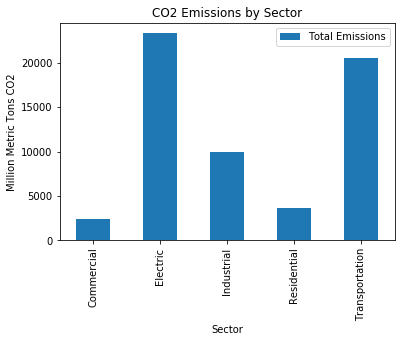

<Figure size 432x288 with 0 Axes>

In [65]:
#Need to add different colors
sector_chart = sector_10yrs_df.plot(kind="bar", title="CO2 Emissions by Sector")
sector_chart.set_xlabel("Sector")
sector_chart.set_ylabel("Million Metric Tons CO2")

plt.show()
plt.tight_layout()